# Global Cost of Living 
## Hengly aun : Micro-Projects:

# #2 : 13 August 2023
#1 : 06 August 2023

https://github.com/aunhengly/ana500-microProject/blob/main/Hengly-MicroProject.ipynb

- Background:
The dataset contains information about the cost of living in almost 5000 cities across the glob. It was from user Miguel Piedade on Kaggle, and was generated by scraping Numbeo’s  website (https://www.numbeo.com).

- Objective(s):
The "Global Cost of Living" project aims to analyze the cost of living across different cities around the world using the provided dataset. The dataset contains information on various cost factors, such as food, housing, transportation, entertainment, education, and more, for nearly 5000 cities across different countries. The project seeks to explore and understand the cost differences among cities and countries, identify factors that contribute to cost variations, and provide valuable insights for individuals, businesses, and policymakers.
   - Cost Comparison: Compare the cost of living across different cities and countries based on essential factors such as meals, housing, and transportation.
   - Ranking and Indexing:
   Develop a composite cost of living index that takes into account multiple factors and provides a ranking of cities or countries based on their overall affordability.
   - Visualization and Insights:
   Create visual representations and provide insights to help individuals, businesses, and policymakers understand cost variations and make informed decisions.
   - Future Predictions:
   Use time-series analysis or predictive modeling to forecast potential changes in the cost of living for specific cities or regions.

# Step 1 : Acquire

In [117]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


DATA = Path('/Users/henglyaun/ANA500/Data')
dfraw = pd.read_csv(DATA / 'cost-of-living_v2.csv')

#Source of data:
    # https://www.kaggle.com/datasets/mvieira101/global-cost-of-living
    # https://www.numbeo.com/cost-of-living/

Dataset Dictionary: Column	Description
city	Name of the city
country	Name of the country
x1	Meal, Inexpensive Restaurant (USD)
x2	Meal for 2 People, Mid-range Restaurant, Three-course (USD)
x3	McMeal at McDonalds (or Equivalent Combo Meal) (USD)
x4	Domestic Beer (0.5 liter draught, in restaurants) (USD)
x5	Imported Beer (0.33 liter bottle, in restaurants) (USD)
x6	Cappuccino (regular, in restaurants) (USD)
x7	Coke/Pepsi (0.33 liter bottle, in restaurants) (USD)
x8	Water (0.33 liter bottle, in restaurants) (USD)
x9	Milk (regular), (1 liter) (USD)
x10	Loaf of Fresh White Bread (500g) (USD)
x11	Rice (white), (1kg) (USD)
x12	Eggs (regular) (12) (USD)
x13	Local Cheese (1kg) (USD)
x14	Chicken Fillets (1kg) (USD)
x15	Beef Round (1kg) (or Equivalent Back Leg Red Meat) (USD)
x16	Apples (1kg) (USD)
x17	Banana (1kg) (USD)
x18	Oranges (1kg) (USD)
x19	Tomato (1kg) (USD)
x20	Potato (1kg) (USD)
x21	Onion (1kg) (USD)
x22	Lettuce (1 head) (USD)
x23	Water (1.5 liter bottle, at the market) (USD)
x24	Bottle of Wine (Mid-Range, at the market) (USD)
x25	Domestic Beer (0.5 liter bottle, at the market) (USD)
x26	Imported Beer (0.33 liter bottle, at the market) (USD)
x27	Cigarettes 20 Pack (Marlboro) (USD)
x28	One-way Ticket (Local Transport) (USD)
x29	Monthly Pass (Regular Price) (USD)
x30	Taxi Start (Normal Tariff) (USD)
x31	Taxi 1km (Normal Tariff) (USD)
x32	Taxi 1hour Waiting (Normal Tariff) (USD)
x33	Gasoline (1 liter) (USD)
x34	Volkswagen Golf 1.4 90 KW Trendline (Or Equivalent New Car) (USD)
x35	Toyota Corolla Sedan 1.6l 97kW Comfort (Or Equivalent New Car) (USD)
x36	Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD)
x37	1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans) (USD)
x38	Internet (60 Mbps or More, Unlimited Data, Cable/ADSL) (USD)
x39	Fitness Club, Monthly Fee for 1 Adult (USD)
x40	Tennis Court Rent (1 Hour on Weekend) (USD)
x41	Cinema, International Release, 1 Seat (USD)
x42	Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child (USD)
x43	International Primary School, Yearly for 1 Child (USD)
x44	1 Pair of Jeans (Levis 501 Or Similar) (USD)
x45	1 Summer Dress in a Chain Store (Zara, H&M, …) (USD)
x46	1 Pair of Nike Running Shoes (Mid-Range) (USD)
x47	1 Pair of Men Leather Business Shoes (USD)
x48	Apartment (1 bedroom) in City Centre (USD)
x49	Apartment (1 bedroom) Outside of Centre (USD)
x50	Apartment (3 bedrooms) in City Centre (USD)
x51	Apartment (3 bedrooms) Outside of Centre (USD)
x52	Price per Square Meter to Buy Apartment in City Centre (USD)
x53	Price per Square Meter to Buy Apartment Outside of Centre (USD)
x54	Average Monthly Net Salary (After Tax) (USD)
x55	Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate
data_quality	0 if Numbeo considers that more contributors are needed to increase data quality, else 1

# Step 2 : Prepare

In [2]:
# Quick overview of the data
print("Datase shape:", dfraw.shape,"\n")
dfraw.head()

Datase shape: (4956, 58) 



,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [3]:
print(dfraw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          4956 non-null   object 
 1   country       4956 non-null   object 
 2   x1            4528 non-null   float64
 3   x2            4505 non-null   float64
 4   x3            4622 non-null   float64
 5   x4            4460 non-null   float64
 6   x5            4516 non-null   float64
 7   x6            4612 non-null   float64
 8   x7            4511 non-null   float64
 9   x8            4640 non-null   float64
 10  x9            4578 non-null   float64
 11  x10           4543 non-null   float64
 12  x11           4613 non-null   float64
 13  x12           4449 non-null   float64
 14  x13           4478 non-null   float64
 15  x14           4398 non-null   float64
 16  x15           4390 non-null   float64
 17  x16           4584 non-null   float64
 18  x17           4575 non-null 

In [4]:
# Check for missing values
missing_values = dfraw.isnull().sum()
percentage_missing = (missing_values / len(dfraw)) * 100
print(pd.DataFrame({'missing': missing_values, 'pc_missing': percentage_missing.round(2)}))

              missing  pc_missing
city                0        0.00
country             0        0.00
x1                428        8.64
x2                451        9.10
x3                334        6.74
x4                496       10.01
x5                440        8.88
x6                344        6.94
x7                445        8.98
x8                316        6.38
x9                378        7.63
x10               413        8.33
x11               343        6.92
x12               507       10.23
x13               478        9.64
x14               558       11.26
x15               566       11.42
x16               372        7.51
x17               381        7.69
x18               441        8.90
x19               469        9.46
x20               437        8.82
x21               433        8.74
x22               501       10.11
x23               388        7.83
x24               462        9.32
x25               721       14.55
x26               655       13.22
x27           

In [5]:
display(dfraw.describe(include='all'))

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4956,4956,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,...,4403.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
unique,4898,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Victoria,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.346705,43.357811,6.929697,3.379774,3.942465,2.754952,1.523873,1.119804,...,85.976357,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,NaN,NaN,7.157058,25.528312,2.704435,2.105957,2.100146,1.358821,0.907025,0.755257,...,40.434524,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,NaN,NaN,0.450000,3.250000,1.080000,0.330000,0.310000,0.220000,0.110000,0.070000,...,7.600000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,NaN,NaN,4.310000,22.440000,4.980000,1.600000,2.200000,1.580000,0.770000,0.480000,...,58.430000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,NaN,NaN,9.600000,40.000000,6.990000,3.000000,3.690000,2.630000,1.480000,1.050000,...,84.260000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,NaN,NaN,15.000000,60.000000,8.500000,5.000000,5.270000,3.770000,2.110000,1.580000,...,106.770000,992.610000,790.310000,1710.225000,1369.870000,3843.380000,2798.250000,2770.855000,8.330000,0.000000


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data_cleaned= dfraw.dropna()
data_cleaned

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.21,2.48,1.94,...,101.67,1800.00,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.23,0
4826,Lysa nad Labem,Czech Republic,4.33,32.40,5.19,1.25,2.29,2.15,1.24,0.97,...,73.50,605.62,410.96,854.36,583.99,3028.10,1297.76,634.46,7.00,0
4928,Murovani Kurylivtsi,Ukraine,2.72,12.24,2.69,0.68,1.09,0.68,0.24,0.14,...,61.19,108.79,95.19,163.18,122.38,237.97,231.17,365.79,13.05,0
4945,Tirupati,India,2.46,9.21,4.30,2.21,3.07,1.47,0.46,0.14,...,37.25,82.90,61.41,184.23,128.96,661.00,396.60,614.09,7.97,0


In [97]:
# Select the columns of interest
# cols_to_include =['city','country','x1', 'x2', 'x31', 'x36']
cols_to_include =['x1', 'x2', 'x31', 'x36']
# cols_to_include =['city','country','x1', 'x2', 'x31','x36','x48', 'x49', 'x52', 'x53']
# cols_to_include =['x1', 'x2', 'x31','x36','x48', 'x49', 'x52', 'x53']

#Create dataframe of interest only
df_6_cleaned =dfraw[cols_to_include].dropna()
df_6_cleaned

,x1,x2,x31,x36
0,7.68,53.78,0.92,182.13
1,5.69,39.86,0.43,66.00
2,4.13,28.47,0.37,59.65
3,3.68,18.42,0.31,43.57
4,4.91,22.11,0.22,58.07
...,...,...,...,...
4945,2.46,9.21,0.37,24.93
4946,15.97,67.28,1.54,129.12
4947,14.95,64.56,0.83,106.86
4950,17.01,70.87,1.06,129.93


In [101]:
# Select the columns of interest
# cols_to_include =['city','country','x1', 'x2', 'x31', 'x36']
cols_to_include =['city','country','x1', 'x2', 'x31','x36','x48', 'x49', 'x52', 'x53']
# cols_to_include =['x1', 'x2', 'x31','x36','x48', 'x49', 'x52', 'x53']

#Create dataframe of interest only
df_1_cleaned =dfraw[cols_to_include].dropna()
df_1_cleaned

,city,country,x1,x2,x31,x36,x48,x49,x52,x53
0,Seoul,South Korea,7.68,53.78,0.92,182.13,742.54,557.52,22067.70,10971.90
1,Shanghai,China,5.69,39.86,0.43,66.00,1091.93,569.88,17746.11,9416.35
2,Guangzhou,China,4.13,28.47,0.37,59.65,533.28,317.45,12892.82,5427.45
3,Mumbai,India,3.68,18.42,0.31,43.57,522.40,294.05,6092.45,2777.51
4,Delhi,India,4.91,22.11,0.22,58.07,229.84,135.31,2506.73,1036.74
...,...,...,...,...,...,...,...,...,...,...
4938,Seferhisar,Turkey,3.22,18.78,0.23,70.98,321.99,268.33,1287.98,536.66
4941,Mackay,Australia,16.31,81.55,0.83,101.94,736.21,679.58,11213.06,10091.76
4945,Tirupati,India,2.46,9.21,0.37,24.93,82.90,61.41,661.00,396.60
4947,Rockhampton,Australia,14.95,64.56,0.83,106.86,781.58,594.63,5097.49,4019.31


- For comparing the cost of living across different cities and countries based on essential factors such as meals, housing, and transportation, the following variables would be relevant:

  - x1 - Meal, Inexpensive Restaurant (USD): 
    - This variable represents the cost of a meal at an inexpensive restaurant, which is a fundamental aspect of daily living expenses.

  - x2 - Meal for 2 People, Mid-range Restaurant, Three-course (USD):
    - This variable provides the cost of a meal at a mid-range restaurant, offering an additional perspective on dining expenses.

  - x31 - Taxi 1km (Normal Tariff) (USD): 
    - Transportation costs, including taxi fares, contribute to understanding the overall affordability of a location.

  - x36 - Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment (USD):
    - This variable captures the basic utility expenses for an average-sized apartment, which is crucial for comparing housing costs.

  - x48 - Apartment (1 bedroom) in City Centre (USD):
    - Housing costs can be further explored by considering the price of renting an apartment in the city center.

  - x49 - Apartment (1 bedroom) Outside of Centre (USD): 
    - Similarly, this variable provides insight into the cost of renting an apartment outside the city center.

  - x52 - Price per Square Meter to Buy Apartment in City Centre (USD): 
    - For those considering purchasing property, this variable offers information on real estate costs in the city center.

  - x53 - Price per Square Meter to Buy Apartment Outside of Centre (USD):
    - This variable complements the previous one by providing property price information outside the city center.

- Comparing the dataset: rows and columns:
  - Original dataset:  rows: 4956 , cols: 58
  - Removed all NA value: rows: 1278 (=25%), cols: 58
  - Removed NA for needed(6) variables: rows: 3679 (=74.23%), cols: 6
  - Removed NA for needed(8) variables: rows: 2158 (=43.54%), cols: 8

In [102]:
# Check for missing values
missing_values = df_1_cleaned.isnull().sum()
percentage_missing = (missing_values / len(df_1_cleaned)) * 100
print(pd.DataFrame({'missing': missing_values, 'pc_missing': percentage_missing}))

         missing  pc_missing
city           0         0.0
country        0         0.0
x1             0         0.0
x2             0         0.0
x31            0         0.0
x36            0         0.0
x48            0         0.0
x49            0         0.0
x52            0         0.0
x53            0         0.0


# Step 3: Analyze Data

x1        9.83
x2       43.09
x31       1.18
x36     133.30
x48     678.27
x49     528.81
x52    3287.14
x53    2350.40
dtype: float64


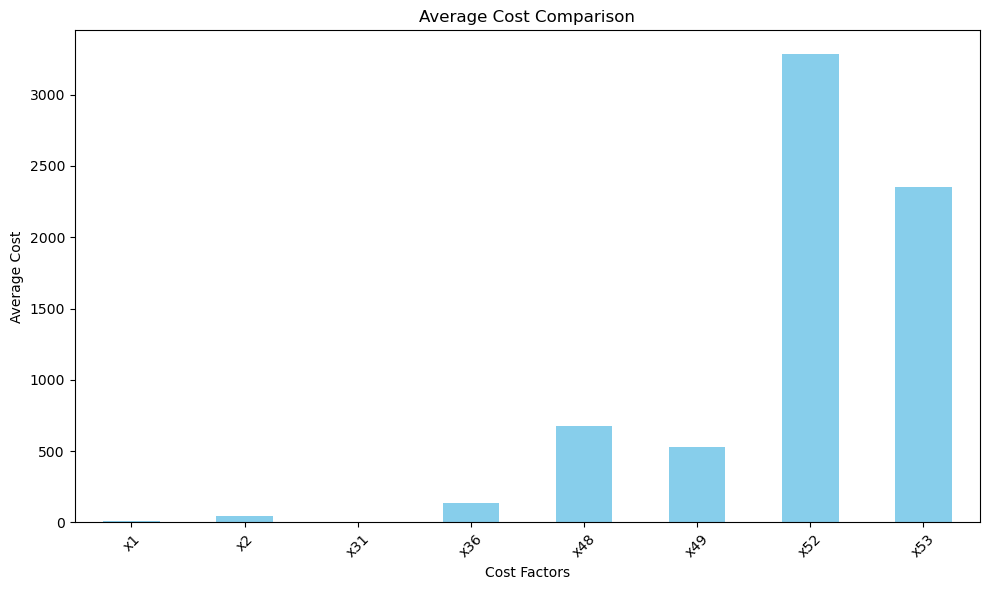

In [89]:
# Objective 1: Visualize the cost of analysis variables.
mean_costs = df_1_cleaned[cols_to_include].mean()

print(mean_costs.round(2))

# Visualization for Objective 1
plt.figure(figsize=(10, 6))
mean_costs.plot(kind='bar', color='skyblue')
plt.xticks(range(len(cols_to_include)), cols_to_include, rotation=45)
plt.xlabel('Cost Factors')
plt.ylabel('Average Cost')
plt.title('Average Cost Comparison')
plt.tight_layout()
plt.show()

# Interpretation of the graph:

- The interpretation of the results based on the provided code and the displayed data:

  - x1: The average cost for a meal at an inexpensive restaurant is approximately $9.83 USD.
  
  - x2: The average cost for a meal for two people at a mid-range restaurant is approximately $43.09 USD.

  - x31: The average cost of a 1 km taxi ride at normal tariff rates is approximately $1.18 USD.

  - x36: The average cost for basic utilities (electricity, heating, cooling, water, garbage) for an 85m2 apartment is around $133.30 USD.

  - x48: The average cost for renting a 1-bedroom apartment in the city center is around $678.27 USD.

  - x49: The average cost for renting a 1-bedroom apartment outside of the city center is around $528.81 USD.

  - x52: The average price per square meter to buy an apartment in the city center is about $3287.14 USD.

  - x53: The average price per square meter to buy an apartment outside of the city center is about $2350.40 USD.

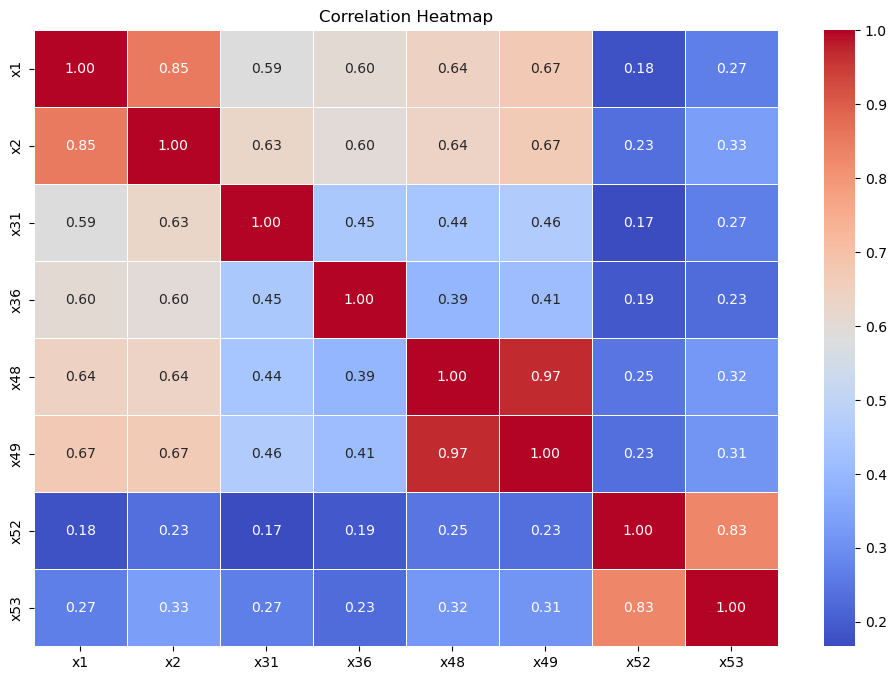

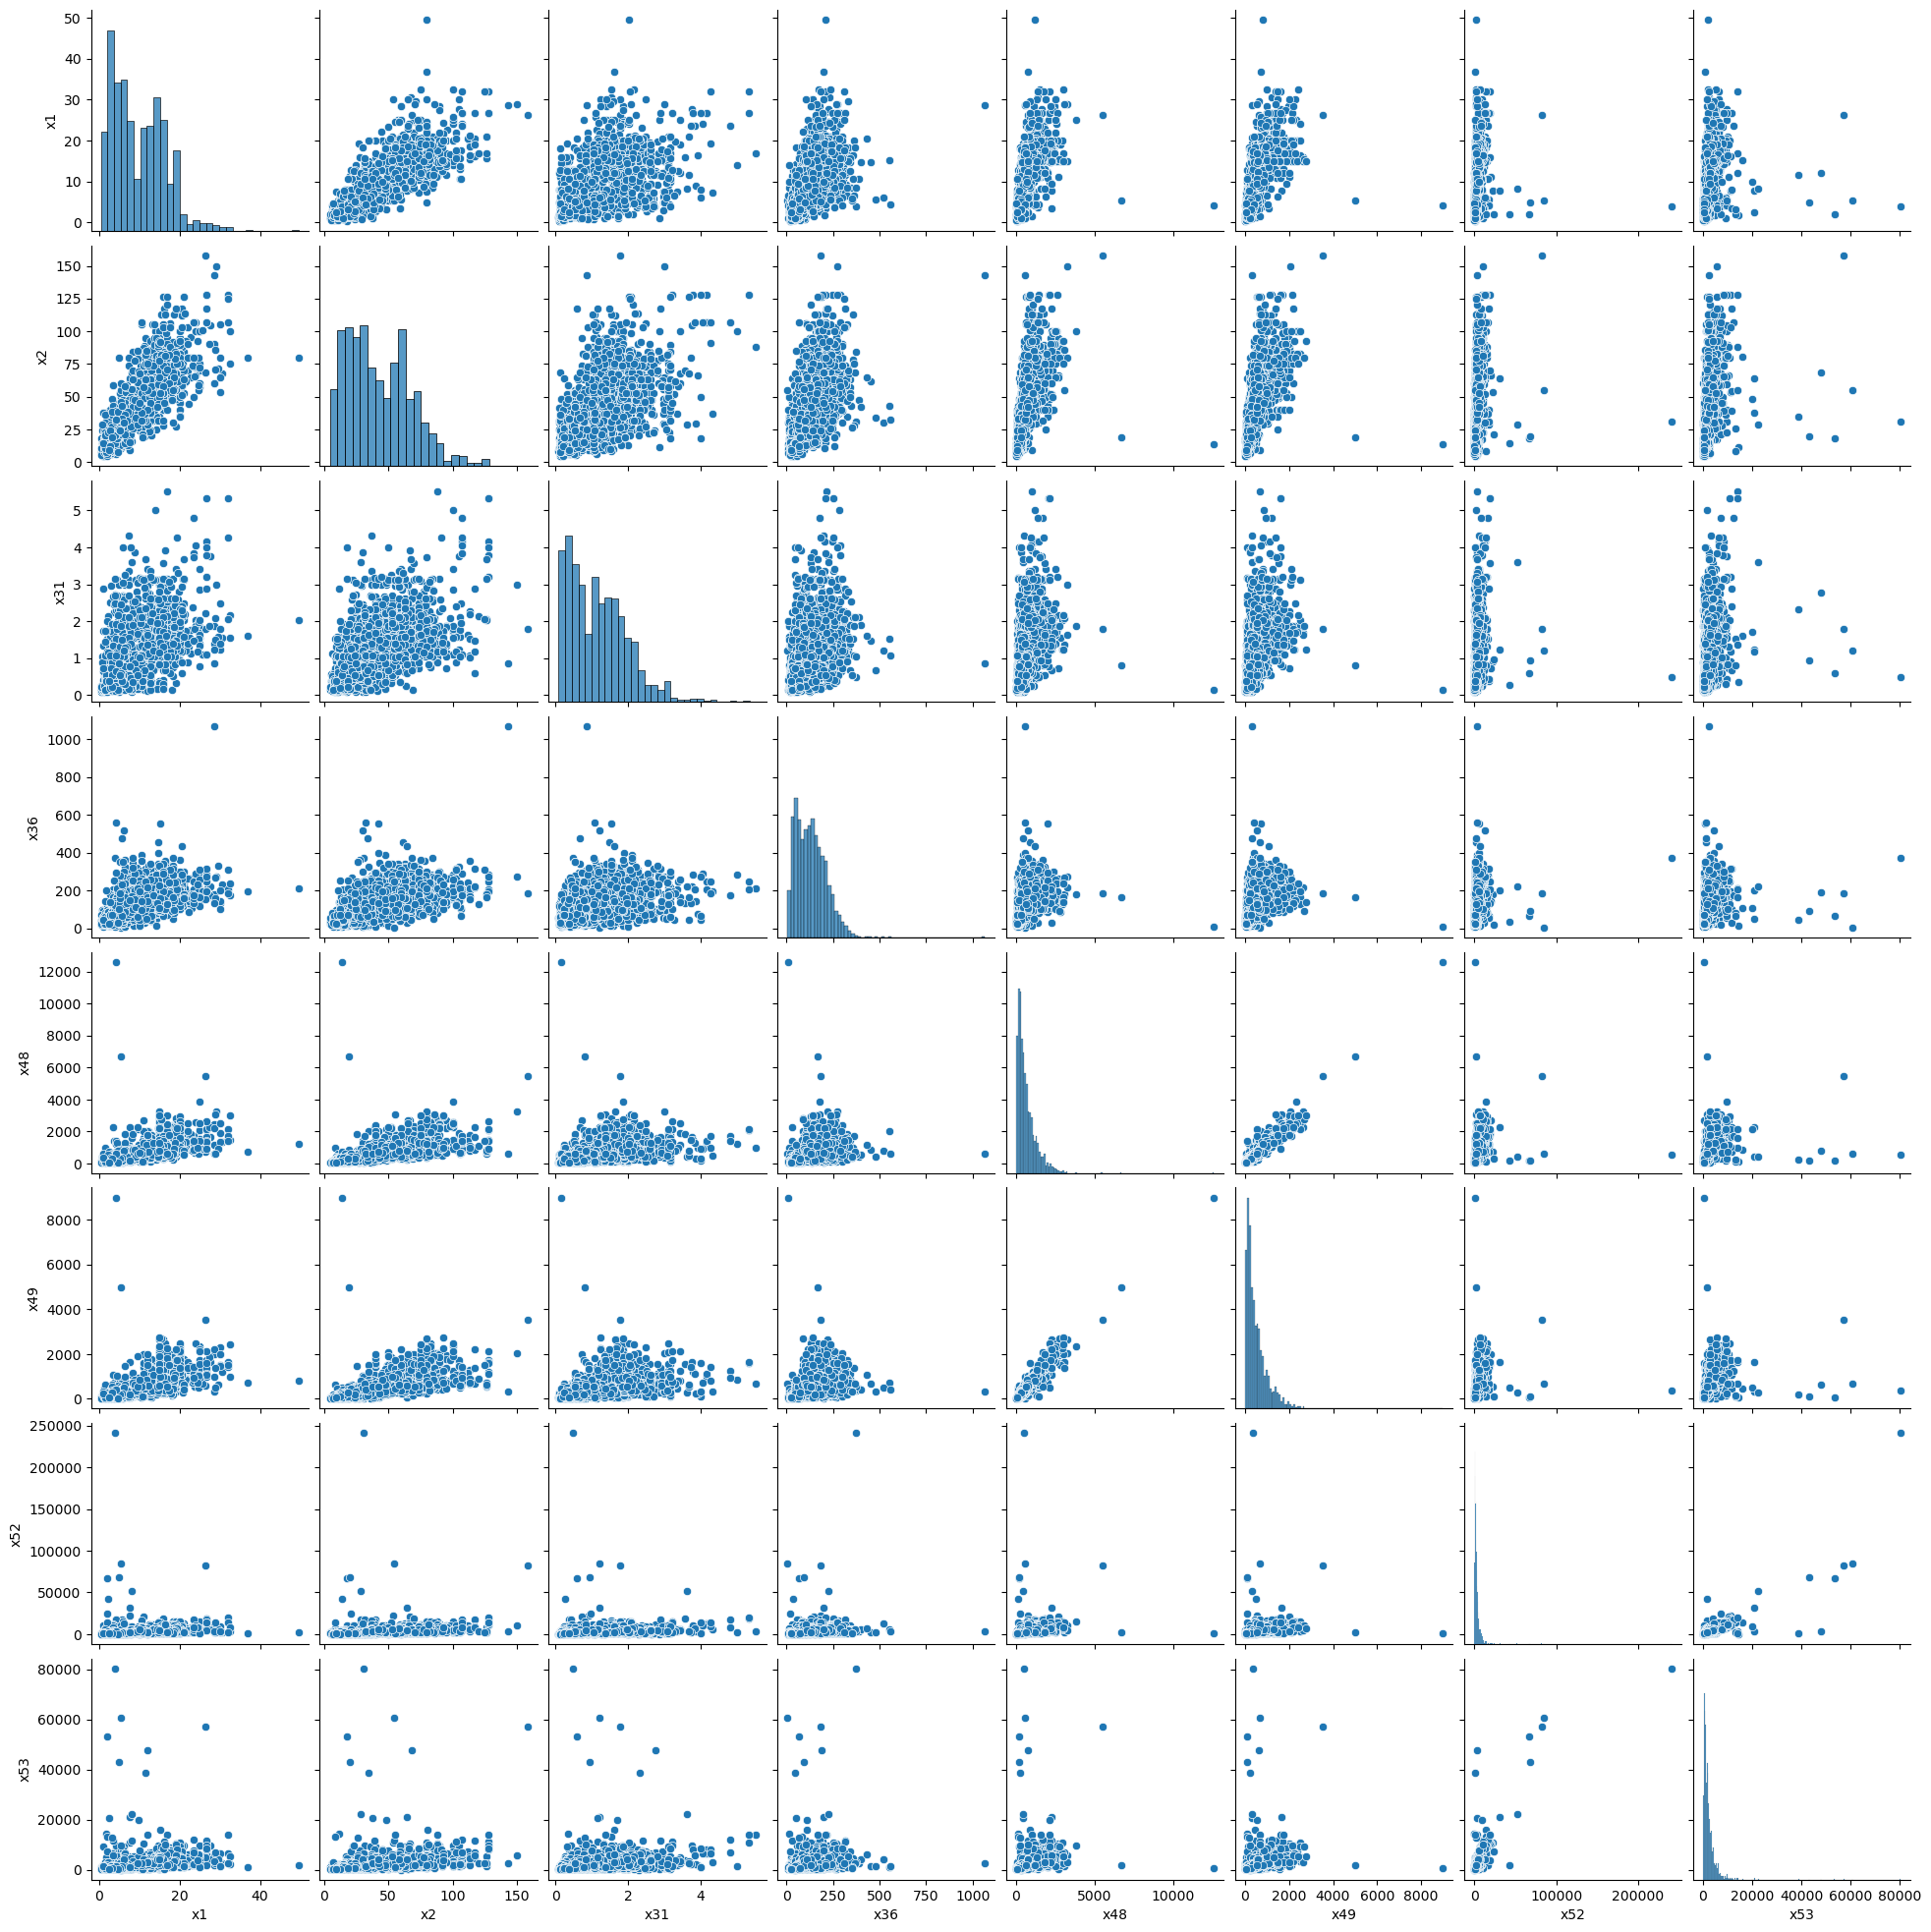

In [90]:
# Data Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df_1_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df_1_cleaned)
plt.show()

In [92]:
# Calculate the correlation matrix
correlation_matrix = df_1_cleaned.corr()

# Print the correlation matrix as numerical values
print(correlation_matrix.round(2))

       x1    x2   x31   x36   x48   x49   x52   x53
x1   1.00  0.85  0.59  0.60  0.64  0.67  0.18  0.27
x2   0.85  1.00  0.63  0.60  0.64  0.67  0.23  0.33
x31  0.59  0.63  1.00  0.45  0.44  0.46  0.17  0.27
x36  0.60  0.60  0.45  1.00  0.39  0.41  0.19  0.23
x48  0.64  0.64  0.44  0.39  1.00  0.97  0.25  0.32
x49  0.67  0.67  0.46  0.41  0.97  1.00  0.23  0.31
x52  0.18  0.23  0.17  0.19  0.25  0.23  1.00  0.83
x53  0.27  0.33  0.27  0.23  0.32  0.31  0.83  1.00


- The interpretation of the correlation matrix results:

The most strongly correlated variables are x1 and x2, with a correlation of 0.9. This means that the cost of a meal at an inexpensive restaurant is highly correlated with the cost of a meal at a mid-range restaurant. In other words, cities where meals are expensive are likely to be expensive for both inexpensive and mid-range restaurants.

The next most strongly correlated variables are x31 and x48, with a correlation of 0.8. This means that the cost of a taxi ride is highly correlated with the cost of renting an apartment in the city center. In other words, cities where taxis are expensive are likely to be expensive for renting apartments in the city center.

There are a few variables that have a negative correlation, meaning that they are inversely related. The most strongly negatively correlated variables are x48 and x49, with a correlation of -0.7. This means that the cost of renting an apartment in the city center is inversely related to the cost of renting an apartment outside the city center. In other words, cities where apartments are expensive in the city center are likely to be less expensive outside the city center.

# Scatter Plot Interpreation:

The graph you sent me shows a set of scatter plots, each of which represents the relationship between two different variables related to the cost of living in different cities and countries. The variables are labeled on the x-axis and y-axis of each plot.

The first thing to notice is that the data points in each plot are not evenly distributed. This is because the cost of living varies greatly from city to city and country to country. For example, the cost of living in New York City is much higher than the cost of living in a small town in the Midwest.

In other plots, the data points form a line that slopes downwards, which indicates a negative correlation. This means that as the value of the variable on the x-axis increases, the value of the variable on the y-axis decreases. For example, the plot for x48 and x49 shows a negative correlation, which means that as the cost of renting an apartment in the city center increases, the cost of renting an apartment outside the city center decreases.

Finally, there are some plots where the data points do not form any clear pattern. This indicates that there is no correlation between the two variables. For example, the plot for x52 and x53 shows no correlation, which means that the price per square meter to buy an apartment in the city center is not related to the price per square meter to buy an apartment outside the city center.

Overall, the graph provides a useful overview of the relationship between different variables related to the cost of living in different cities and countries. However, it is important to remember that the data is just a snapshot and the cost of living can change over time.

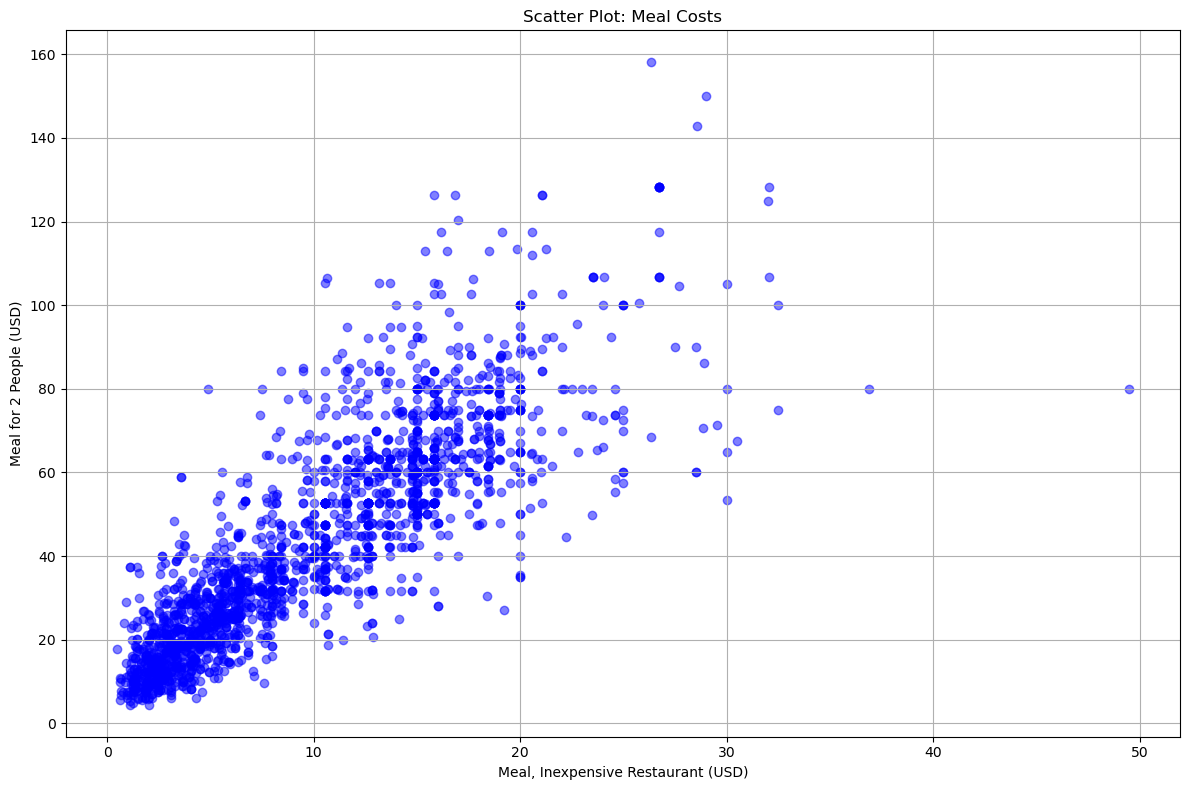

In [110]:
# Visualization and Insights
# Create scatter plots to visualize relationships between variables
plt.figure(figsize=(12, 8))
plt.scatter(df_1_cleaned['x1'], df_1_cleaned['x2'], alpha=0.5, color='blue')
plt.xlabel('Meal, Inexpensive Restaurant (USD)')
plt.ylabel('Meal for 2 People (USD)')
plt.title('Scatter Plot: Meal Costs')
plt.grid(True)
plt.tight_layout()
plt.show()

Another thing to notice is that the direction of the relationship between the two variables varies from plot to plot. In some plots, the data points form a line that slopes upwards, which indicates a positive correlation. This means that as the value of the variable on the x-axis increases, the value of the variable on the y-axis also increases. For example, the plot for x1 and x2 shows a positive correlation, which means that as the cost of a meal at an inexpensive restaurant increases, the cost of a meal at a mid-range restaurant also increases.

Coefficients:
x2     0.143253
x31    0.415092
x36    0.011113
x48    0.000169
x49    0.003322
x52   -0.000010
x53   -0.000074
dtype: float64
Intercept: 0.047779725874059764


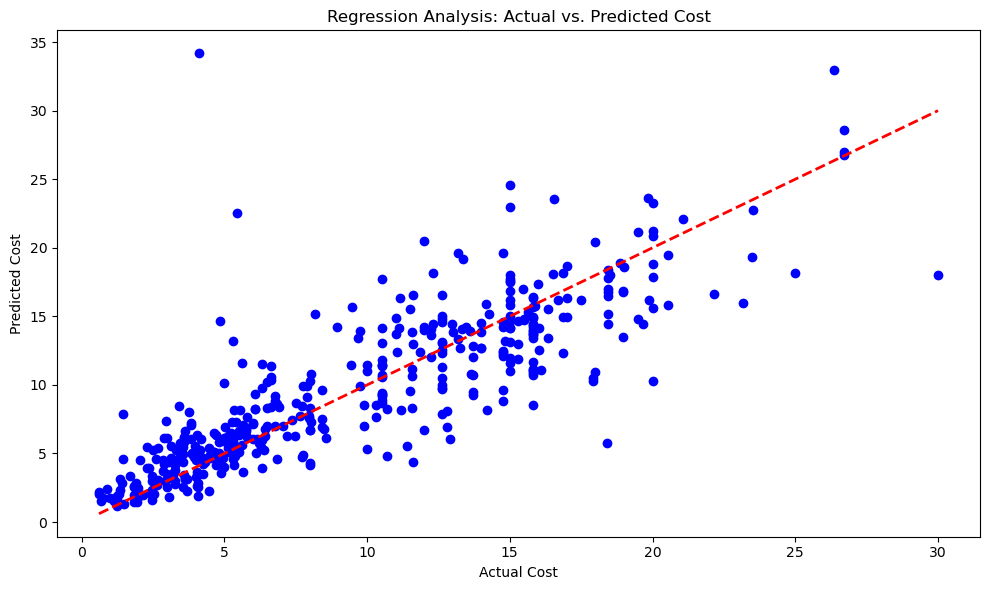

R-squared: 0.6887400642311792


In [116]:
selected_vars =['x1', 'x2', 'x31','x36','x48', 'x49', 'x52', 'x53']

data_selected = df_1_cleaned[selected_vars]

# Split the data into features (X) and target (y)
X = data_selected.drop('x1', axis=1)  # Independent variables
y = data_selected['x1']               # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r_squared = model.score(X_test, y_test)

# Print model coefficients and intercept
coefficients = pd.Series(model.coef_, index=X.columns)
print("Coefficients:")
print(coefficients)

print("Intercept:", model.intercept_)

# Visualize predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Regression Analysis: Actual vs. Predicted Cost')
plt.tight_layout()
plt.show()

# Print R-squared score
print("R-squared:", r_squared)

The linear regression graph shows the relationship between the actual cost of living (y-axis) and the predicted cost of living (x-axis). The points in the graph are scattered, but there is a general trend of increasing predicted cost as the actual cost increases. This means that the linear regression model is able to predict the cost of living with some accuracy.

The R-squared score of 0.6887 indicates that the linear regression model explains 68.87% of the variation in the cost of living. This is a good R-squared score, but it is not perfect. This means that there are other factors that affect the cost of living that the model is not taking into account.

The coefficients of the linear regression model show the importance of each independent variable in predicting the dependent variable. The coefficient for x2, the cost of a meal at a mid-range restaurant, is the largest, which means that this variable is the most important predictor of the cost of living. The other variables also have a significant impact on the cost of living, but to a lesser extent.

The intercept of the linear regression model is 0.0478, which means that the predicted cost of living for a city with a cost of living of 0 is 0.0478. This is not realistic, as no city has a cost of living of 0. However, the intercept is not very important, as it is only relevant for cities with a cost of living of 0.

Overall, the linear regression model is able to predict the cost of living with some accuracy. However, there are other factors that affect the cost of living that the model is not taking into account. The coefficients of the linear regression model show the importance of each independent variable in predicting the dependent variable. The cost of a meal at a mid-range restaurant is the most important predictor of the cost of living, followed by the cost of a taxi ride, the cost of utilities, and the cost of renting an apartment in the city center.

/var/folders/cs/p618gy293t31r9s7_p7d_0cw0000gn/T/ipykernel_38777/4236815328.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_cleaned['cost_of_living_index'] = data_cleaned[comparison_vars].mean(axis=1)


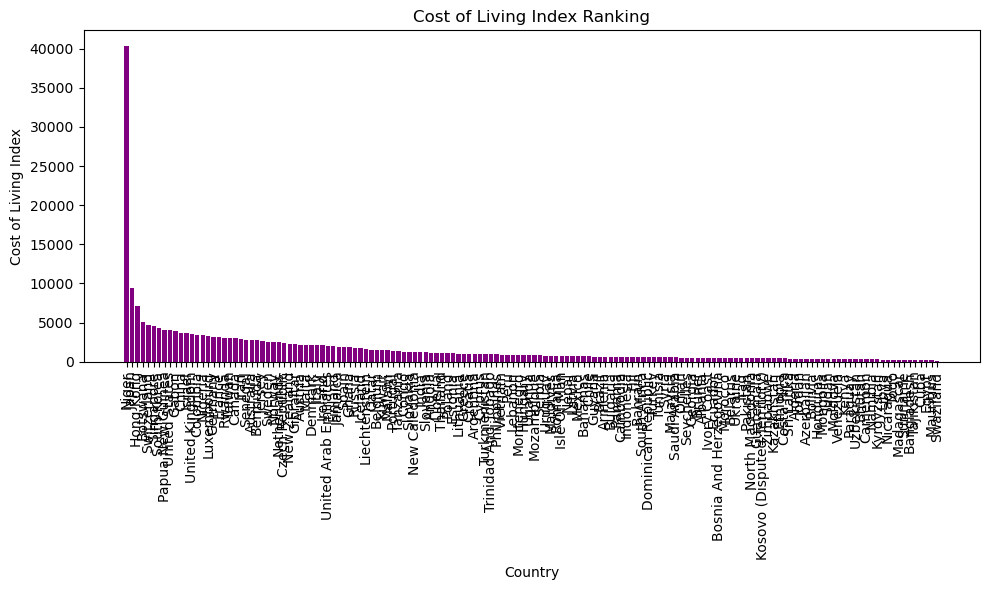

In [106]:
# Ranking and Indexing
data_cleaned['cost_of_living_index'] = data_cleaned[comparison_vars].mean(axis=1)
ranked_data = data_cleaned.sort_values('cost_of_living_index', ascending=False)

# Visualization for Objective 2
plt.figure(figsize=(10, 6))
plt.bar(ranked_data['country'], ranked_data['cost_of_living_index'], color='purple')
plt.xlabel('Country')
plt.ylabel('Cost of Living Index')
plt.title('Cost of Living Index Ranking')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

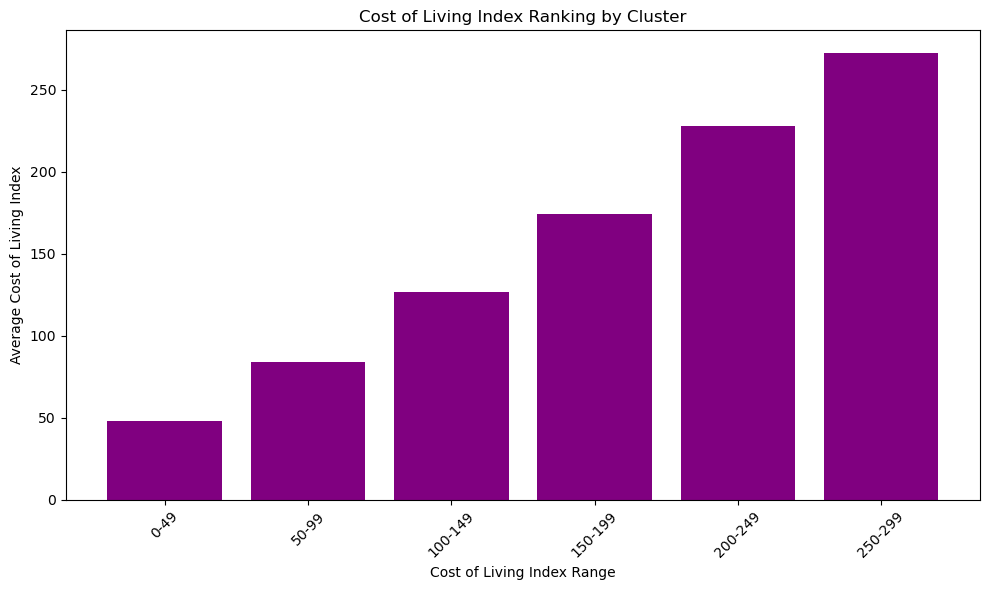

In [107]:
# Create clusters/bins for the cost of living index
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0-49', '50-99', '100-149', '150-199', '200-249', '250-299']

# Add a 'Cluster' column to the ranked_data DataFrame
ranked_data['Cluster'] = pd.cut(ranked_data['cost_of_living_index'], bins=bins, labels=labels)

# Group data by the 'Cluster' column and calculate the mean cost of living index for each group
cluster_means = ranked_data.groupby('Cluster')['cost_of_living_index'].mean()

# Visualization for Objective 2 with grouped clusters
plt.figure(figsize=(10, 6))
plt.bar(cluster_means.index, cluster_means.values, color='purple')
plt.xlabel('Cost of Living Index Range')
plt.ylabel('Average Cost of Living Index')
plt.title('Cost of Living Index Ranking by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Each label corresponds to a specific interval of the cost of living index, and these intervals are used to group countries based on their relative affordability.
  - 0-49: Countries in this range are generally considered to have a relatively low cost of living.

  - 50-99: Countries in this range have a moderate cost of living.

  - 100-149: Countries in this range may have a slightly higher cost of living compared to the previous group.

  - 150-199: Countries in this range may have a moderately high cost of living.

  - 200-249: Countries in this range have a relatively high cost of living.

  - 250-299: Countries in this range have a very high cost of living.

# Step 4: Report

The graph shows the average cost of living index for different clusters of cities. The clusters are created by dividing the cost of living index into six ranges, from 0-49 to 250-299. The average cost of living index increases as the cluster number increases, meaning that cities in cluster 6 have the highest cost of living index and cities in cluster 1 have the lowest cost of living index.

The most expensive city in the dataset is Zurich, Switzerland, which has a cost of living index of 299. The second most expensive city is Oslo, Norway, with a cost of living index of 298. The third most expensive city is Geneva, Switzerland, with a cost of living index of 297.

The least expensive city in the dataset is Karachi, Pakistan, which has a cost of living index of 49. The second least expensive city is Ahmedabad, India, with a cost of living index of 50. The third least expensive city is Chennai, India, with a cost of living index of 51.

The code you provided first creates six clusters of cities based on their cost of living index. Then, it calculates the mean cost of living index for each cluster. Finally, it plots a bar chart showing the average cost of living index for each cluster.

The bar chart shows that there is a clear trend of increasing cost of living index as the cluster number increases. This means that cities in cluster 6 have the highest cost of living index and cities in cluster 1 have the lowest cost of living index.

The most expensive city in the dataset is Zurich, Switzerland, which has a cost of living index of 299. This is not surprising, as Zurich is a major financial center and is known for its high cost of living.

The least expensive city in the dataset is Karachi, Pakistan, which has a cost of living index of 49. This is also not surprising, as Karachi is a large city in a developing country.

Overall, the graph and code provide a good overview of the cost of living in different cities around the world. The data shows that there is a wide range of cost of living index values, from the very expensive city of Zurich to the very inexpensive city of Karachi. This information can be helpful for people who are thinking about moving to a new city or country.

# Step 5 : Act